<h1><center>Python Assignment</center></h1>

<h2>Problem Statement</h2>
<h3>Find out area of Agricultural land in Texas</h3>

In [1]:
#import library
import os
import matplotlib.pyplot as plt
import numpy as np
import gdal

In [3]:
#define path 
os.chdir('E:\\PYTHON\\nlcd19_48_lc')

In [4]:
#import file
img = gdal.Open('nlcd_2019_land_cover_l48_20210604_TX.img')

In [5]:
#get geotransform of file
igt = img.GetGeoTransform()

In [6]:
#get projection of file
#iproj = img.GetProjection()

In [7]:
#get metadata using band 1 
iband = img.GetRasterBand(1)

In [8]:
#extract data 
data = iband.ReadAsArray()
#data

In [9]:
#get unique pixel value from data and its count
unique_no = np.unique(data, return_counts=True)
unique_no

(array([-128,    0,   11,   21,   22,   23,   24,   31,   41,   42,   43,
          52,   71,   81,   82,   90,   95], dtype=int8),
 array([1056888156,      25309,   15573948,   18541073,   13047785,
           9949312,    4068238,    2544742,   20376221,   43194921,
          16010402,  314749431,  110764265,   75432950,   94867328,
          21397702,    8488257], dtype=int64))

In [10]:
#find index no of cultivable land 
index = np.where((unique_no[0] == 81) | (unique_no[0] == 82))
index

(array([13, 14], dtype=int64),)

In [11]:
#using index, pixel counts for cultivable land
pi = unique_no[1][13] + unique_no[1][14]
#pi

<h4>Area</h4>

In [12]:
#1 square meter = 3.86 * 10e-7 square mile
Area = pi * 30 * 30  #square meter
Area

153270250200

In [13]:
Area_mile2 = Area * 3.86 * 10e-7
Area_mile2    #square mile

591623.165772

<h4>Plot</h4>

In [14]:
x = unique_no[0][2:17].tolist()
y = unique_no[1][2:17].tolist()

In [15]:
x
y

[15573948,
 18541073,
 13047785,
 9949312,
 4068238,
 2544742,
 20376221,
 43194921,
 16010402,
 314749431,
 110764265,
 75432950,
 94867328,
 21397702,
 8488257]

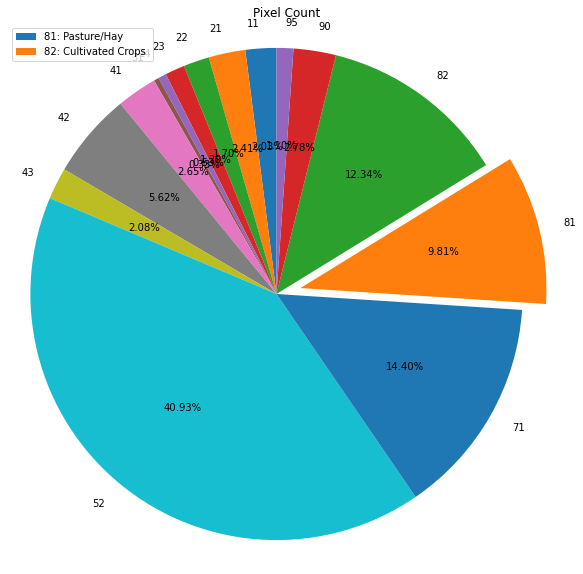

In [16]:
x1=['81: Pasture/Hay','82: Cultivated Crops ']
explode = [0,0,0,0,0,0,0,0,0,0,0,0.1,0.,0,0]
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(y,explode=explode,labels=x,autopct='%1.2f%%',startangle=90)
ax.axis('equal')
plt.legend(labels=x1,loc='upper left')
plt.title('Pixel Count')
plt.show()

In [17]:
area_all = []
for n in y:
    result = n * 900 * 3.86 * 10e-7
    area_all.append(result)

In [18]:
area_all

[54103.895352,
 64411.687602,
 45328.00509,
 34563.909888,
 14133.058812,
 8840.433708,
 70786.991754,
 150059.155554,
 55620.136547999995,
 1093439.523294,
 384795.05660999997,
 262054.06829999998,
 329569.097472,
 74335.616748,
 29488.204818]

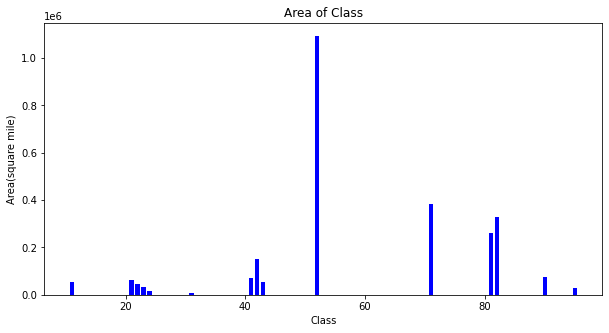

In [19]:
fig = plt.figure(figsize = (10, 5))
plt.bar(x, area_all, color ='b', width = 0.7)
plt.xlabel('Class')
plt.ylabel("Area(square mile)")
plt.title("Area of Class")
plt.show()